<a href="https://colab.research.google.com/github/vbuddharaju4/DEVTERNN/blob/main/The_Discovery_Of_Handwashing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data = pd.read_csv('/monthly_deaths.csv')
data = pd.read_csv('/yearly_deaths_by_clinic.csv')

In [ ]:
data.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [ ]:
data.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [ ]:
data.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [ ]:
yearly_avg_deaths = data.groupby(['year', 'clinic'])['deaths'].mean().reset_index()


In [ ]:
pivot_table = yearly_avg_deaths.pivot_table(index='year', columns='clinic', values='deaths')


In [ ]:
before_1847 = yearly_avg_deaths[yearly_avg_deaths['year'] < 1847]
after_1847 = yearly_avg_deaths[yearly_avg_deaths['year'] >= 1847]

difference = after_1847['deaths'].mean() - before_1847['deaths'].mean()
percent_change = (difference / before_1847['deaths'].mean()) * 100


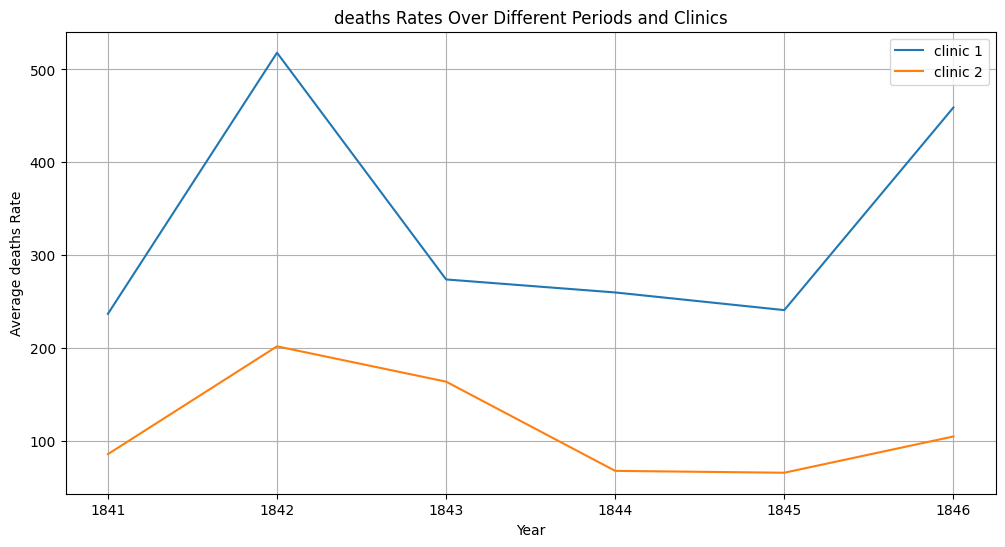

In [ ]:
plt.figure(figsize=(12, 6))
for clinic in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[clinic], label=clinic)
plt.xlabel('Year')
plt.ylabel('Average deaths Rate')
plt.title('deaths Rates Over Different Periods and Clinics')
plt.legend()
plt.grid(True)
plt.show()
